# Import

## My Stuff

In [3]:
from myFunctions.myStravaImportData import stravaInfo

In [4]:
import datetime as datetime

## Interactable widgets
[Examples](https://github.com/WillKoehrsen/Data-Analysis/blob/master/widgets/Widgets-Overview.ipynb) can be found in the github widget overview.

In [5]:
import ipywidgets as widgets
from ipywidgets import interact

# Load the data

In [6]:
payload = {
        'client_id': "xxxx",
        'client_secret': 'xxxxx',
        'refresh_token': 'xxxxx',
        'grant_type': "refresh_token",
        'f': 'json'
    }

In [7]:
myStravaData  = stravaInfo(arg = payload,
                readNewDataFlag = False,
               pickleFile="./vars/myData.pickle")

Active


# Pruning the data

## Get specified activity

In [8]:
myStravaData.getTypeData(activityType='Run')
myRunData = myStravaData.subsetData

## Get specified date

**Note** the widgets may not work in jupyter lab so you have to install node.  I found the solution in here:

- [github forum](https://github.com/jupyter-widgets/ipywidgets/issues/2083)    
- [documentation](https://ipywidgets.readthedocs.io/en/latest/user_install.html#installing-the-jupyterlab-extension)

In [9]:
startDatePicker = widgets.DatePicker(description='Start Date',
                              value = datetime.datetime.strptime("2020-01-01", "%Y-%m-%d"))
endDatePicker = widgets.DatePicker(description='End Date',
                             value=datetime.datetime.today())
display(startDatePicker,endDatePicker)

DatePicker(value=datetime.datetime(2020, 1, 1, 0, 0), description='Start Date')

DatePicker(value=datetime.datetime(2020, 4, 1, 11, 6, 55, 919021), description='End Date')

In [10]:
startDate = startDatePicker.value.strftime("%Y-%m-%d")
endDate = endDatePicker.value.strftime("%Y-%m-%d")

excludeDates = ['2019-08-10',
                '2019-08-12']
myRunDataPrune = myStravaData.getActivityByDateRange(sessionsData=myRunData,
                                                startDate=startDate,
                                                endDate=endDate,
                                                excludeDates=excludeDates,
                                                includeArea=['Toronto'])

# Main

## Graph the running data beteen two dates

In [11]:
#startDate='2019-08-01' 
#endDate='2019-08-31'
edgecolorMap='black'

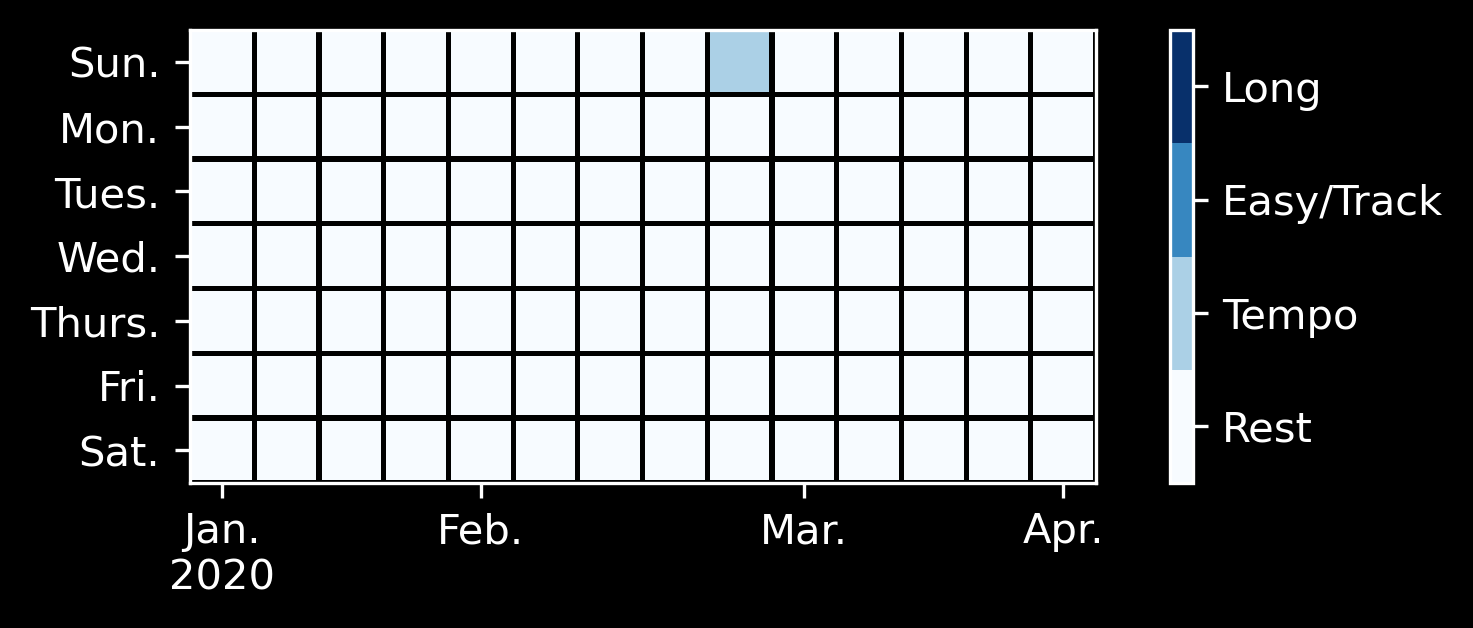

In [12]:
myStravaData.drawCalendarmap(sessionsData =[],
                             start=startDate,
                             end=endDate,
                             edgecolor=edgecolorMap)

## Saving the image

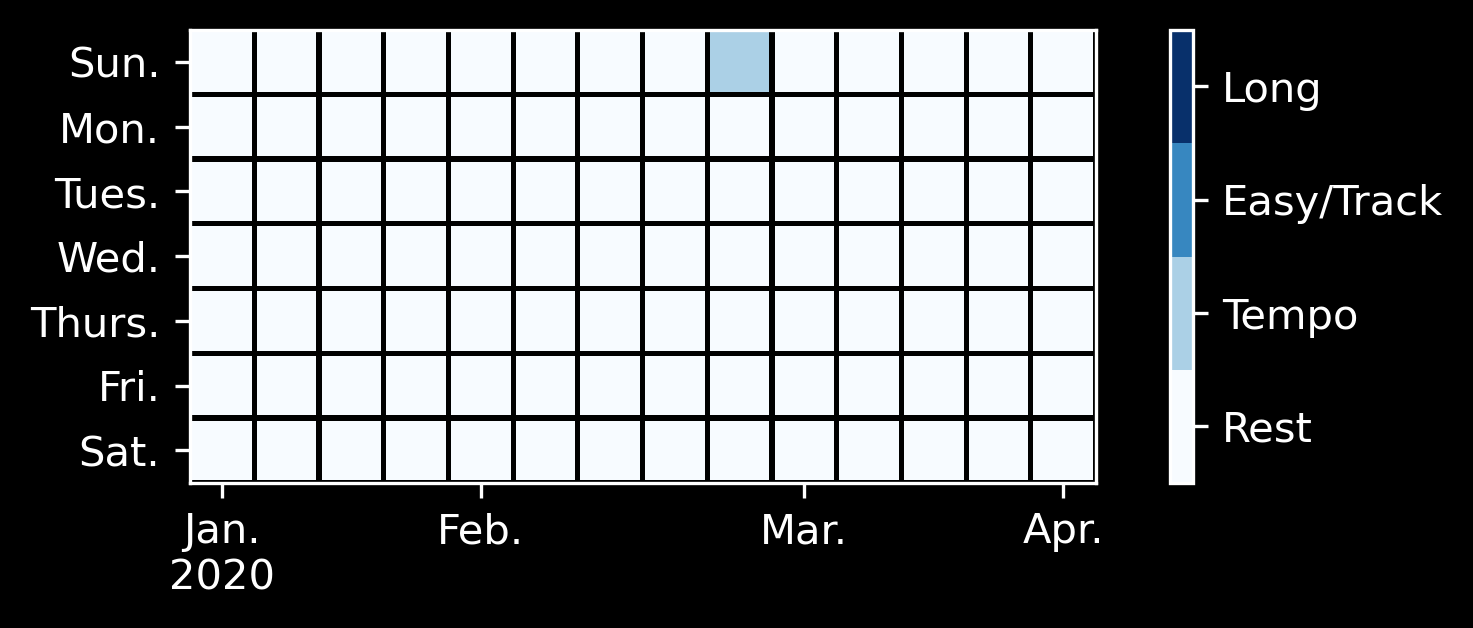

In [13]:
myStravaData.drawCalendarmap(sessionsData=[],
                             start=startDate,
                             end=endDate,
                             edgecolor=edgecolorMap,
                             saveImageFlag=True,
                             saveImageName='./outFile/heatmap.png')